# Módulo 3 - Ejercicio Evaluación Final

### Fase 1 - Exploración

In [1]:
# -----------------------------------------------------------------------
# IMPORTS
# -----------------------------------------------------------------------
# Tratamiento de datos
# -------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# -------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# -------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -------------------------------------------------
pd.set_option('display.max_columns', None)      # Para visualizar todas las columnas de los DataFrames.
pd.set_option('display.max_colwidth', None)     # Para ver todo el contenido de las columnas.

# Gestión de los warnings
# -------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Importaciones funciones propias
# -------------------------------------------------
from src import soporte_eda as sp_eda



In [2]:
# Carga de datos archivo Customer Flight Activity.csv:

# Este archivo contiene información sobre la actividad de vuelo de los clientes, 
# incluyendo el número de vuelos reservados, la distancia volada, puntos acumulados y redimidos, y costos asociados a los puntos redimidos.

df_fa = pd.read_csv("files/Customer Flight Activity.csv")
df_fa.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


In [3]:
sp_eda.exploracion_basica(df_fa)

### Información general del DataFrame ###
Forma (filas, columnas): (405624, 10)
Columnas: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']

Resumen info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Point

Comprobamos esas filas duplicadas:

In [4]:
duplicados = df_fa[df_fa.duplicated(keep=False)]
duplicados.head(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
566,130331,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
659,135421,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0


Como se puede observar, esas filas son idénticas entre ellas (incluyendo sobre todo el id Loyalty Number y Year/Month, que son las que servirían para diferenciar unas con otras) así que podemos eliminarlas todas:

In [5]:
df_fa = df_fa.drop_duplicates()     # Mantiene la primera y elimina las subsecuentes (keep='first' por defecto).

In [6]:
sp_eda.exploracion_basica(df_fa, secciones=['info', 'duplicados'])

### Información general del DataFrame ###
Forma (filas, columnas): (403760, 10)
Columnas: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']

Resumen info():
<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Red

In [7]:
sp_eda.exploracion_basica(df_fa, secciones=['num_desc'])


### Estadísticas descriptivas para variables numéricas ###
                                count           mean            std       min  \
Loyalty Number               403760.0  549875.383713  258961.514684  100018.0   
Year                         403760.0    2017.500352       0.500000    2017.0   
Month                        403760.0       6.501335       3.451982       1.0   
Flights Booked               403760.0       4.134050       5.230064       0.0   
Flights with Companions      403760.0       1.036569       2.080472       0.0   
Total Flights                403760.0       5.170619       6.526858       0.0   
Distance                     403760.0    1214.460979    1434.098521       0.0   
Points Accumulated           403760.0     124.263761     146.696179       0.0   
Points Redeemed              403760.0      30.838587     125.758002       0.0   
Dollar Cost Points Redeemed  403760.0       2.495973      10.172033       0.0   

                                  25%       50% 

In [8]:
df_fa.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [9]:
# Loyalty Number: Este atributo representa un identificador único para cada cliente dentro del programa de lealtad de la aerolínea. 
# Cada número de lealtad corresponde a un cliente específico.

In [10]:
sp_eda.exploracion_num(df_fa,'Year', graficos=False, mostrar_estadisticas=False, mostrar_outliers=False)
# Year: Indica el año en el cual se registraron las actividades de vuelo para el cliente.

La columna 'Year' es de tipo int64.
El número total de valores únicos es de 2.
Los valores únicos son: [2017 2018]
--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(2017),
 'max': np.int64(2018),
 'mean': np.float64(2017.5),
 'median': np.float64(2018.0),
 'std': np.float64(0.5),
 'percentil_25': np.float64(2017.0),
 'percentil_75': np.float64(2018.0)}

In [27]:
sp_eda.exploracion_num(df_fa,'Month', graficos=False, mostrar_estadisticas=False, mostrar_outliers=False)
# Month: Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.

La columna 'Month' es de tipo int64.
El número total de valores únicos es de 12.
Los valores únicos son: [ 1  9  2  3 11  4  5  7  6  8 10 12]
--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(1),
 'max': np.int64(12),
 'mean': np.float64(6.5),
 'median': np.float64(7.0),
 'std': np.float64(3.45),
 'percentil_25': np.float64(4.0),
 'percentil_75': np.float64(10.0)}

In [12]:
df_fa.sample(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
387606,337066,2017,8,12,9,21,1617,161.0,775,62
183442,866501,2017,11,0,0,0,0,0.0,0,0
64070,809733,2017,4,6,0,6,3144,314.0,0,0


La columna 'Flights Booked' es de tipo int64.
El número total de valores únicos es de 22.
Hay muchos valores únicos, aquí algunos ejemplos: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Flights Booked':
 - min: 0
 - max: 21
 - mean: 4.13
 - median: 1.0
 - std: 5.23
 - percentil_25: 0.0
 - percentil_75: 8.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean          4.134050
std           5.230064
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          21.000000
Name: Flights Booked, dtype: float64
--------------------------------------------------------------------------


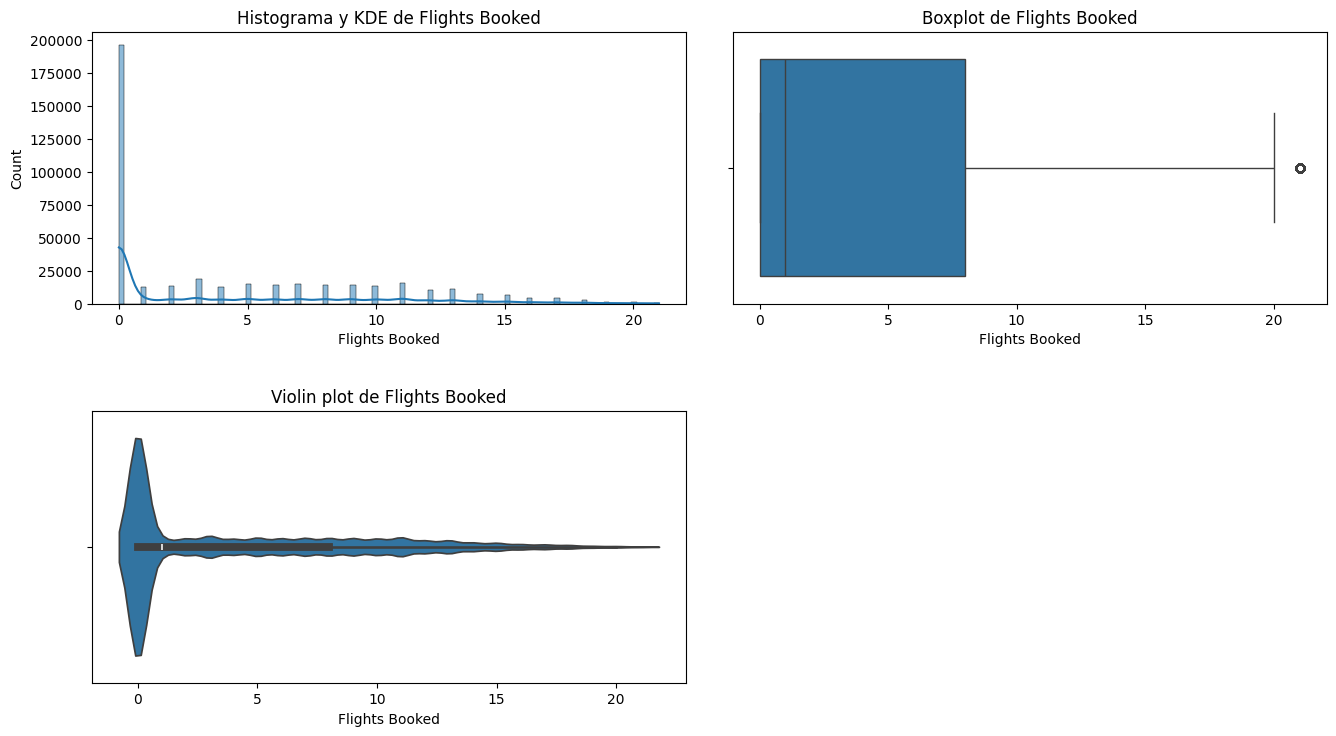

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(21),
 'mean': np.float64(4.13),
 'median': np.float64(1.0),
 'std': np.float64(5.23),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(8.0)}

In [13]:
sp_eda.exploracion_num(df_fa,'Flights Booked', graficos=True, mostrar_estadisticas=True, mostrar_outliers=False)
# Flights Booked: Número total de vuelos reservados por el cliente en ese mes específico.

In [14]:
round(df_fa['Flights Booked'].value_counts(normalize=True).sort_index() * 100,2)     # Porcentajes de aparición de cada valor.

Flights Booked
0     48.58
1      3.14
2      3.38
3      4.51
4      3.18
5      3.74
6      3.43
7      3.61
8      3.56
9      3.51
10     3.31
11     3.89
12     2.57
13     2.67
14     1.75
15     1.63
16     1.08
17     0.97
18     0.73
19     0.37
20     0.29
21     0.13
Name: proportion, dtype: float64

In [15]:
sp_eda.exploracion_num(df_fa,'Flights Booked', graficos=False, mostrar_estadisticas=False, mostrar_outliers=True)

La columna 'Flights Booked' es de tipo int64.
El número total de valores únicos es de 22.
Hay muchos valores únicos, aquí algunos ejemplos: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19]

🔍 Número de outliers detectados: 528
Conteo de outliers por valor único:
Flights Booked
21    528
Name: count, dtype: int64
--------------------------------------------------------------------------
--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(21),
 'mean': np.float64(4.13),
 'median': np.float64(1.0),
 'std': np.float64(5.23),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(8.0),
 'outliers_count': 528,
 'outliers_unique_values': {21: 528}}

La columna 'Flights with Companions' es de tipo int64.
El número total de valores únicos es de 12.
Los valores únicos son: [ 0  4  7  1  6  3  5  2 10  8  9 11]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Flights with Companions':
 - min: 0
 - max: 11
 - mean: 1.04
 - median: 0.0
 - std: 2.08
 - percentil_25: 0.0
 - percentil_75: 1.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean          1.036569
std           2.080472
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          11.000000
Name: Flights with Companions, dtype: float64
--------------------------------------------------------------------------

🔍 Número de outliers detectados: 71560
Conteo de outliers por valor único:
Flights with Companions
3     19015
4     13665
5     13424
6      9911
7      7089
8      3965
9      2944
10     1071
1

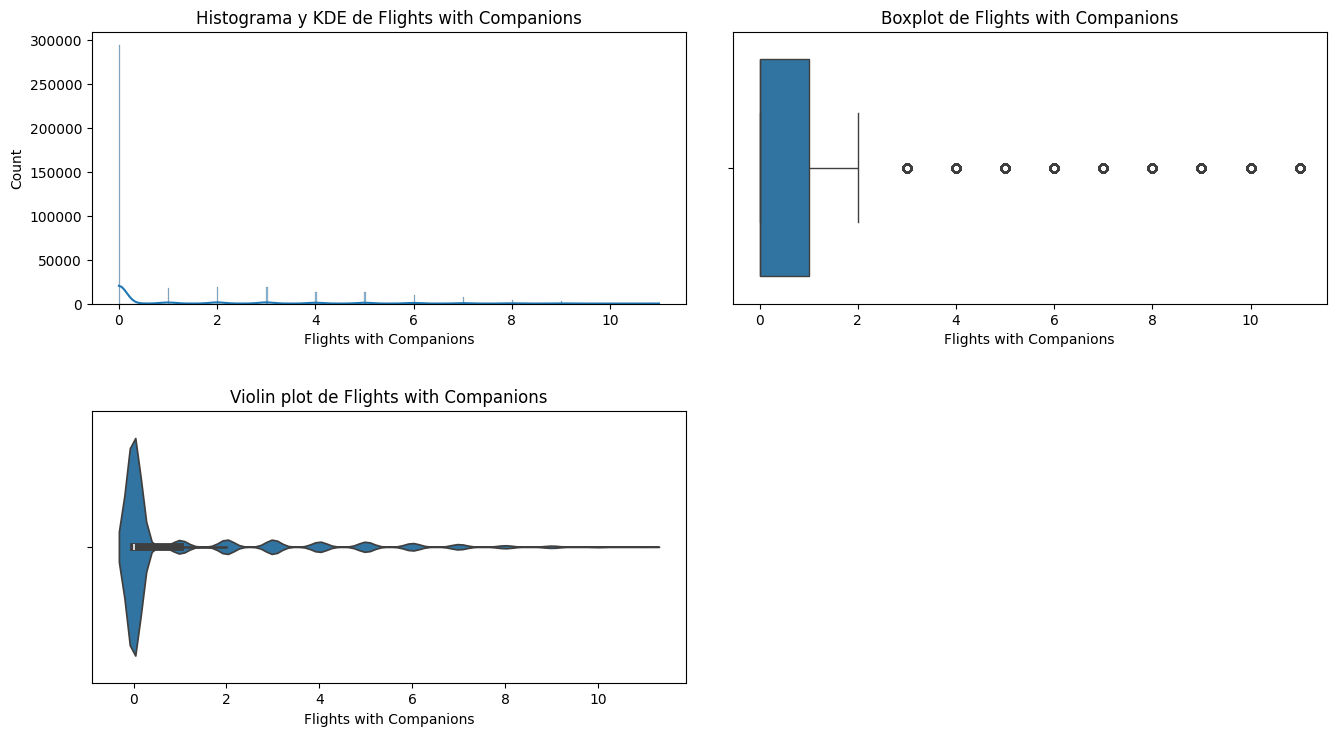

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(11),
 'mean': np.float64(1.04),
 'median': np.float64(0.0),
 'std': np.float64(2.08),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(1.0),
 'outliers_count': 71560,
 'outliers_unique_values': {3: 19015,
  4: 13665,
  5: 13424,
  6: 9911,
  7: 7089,
  8: 3965,
  9: 2944,
  10: 1071,
  11: 476}}

In [16]:
sp_eda.exploracion_num(df_fa,'Flights with Companions', graficos=True, mostrar_estadisticas=True, mostrar_outliers=True)
# Flights with Companions: Número de vuelos reservados en los cuales el cliente viajó con acompañantes.

In [23]:
round(df_fa['Flights with Companions'].value_counts(normalize=True).sort_index() * 100,2)     # Porcentajes de aparición de cada valor.

Flights with Companions
0     73.07
1      4.43
2      4.77
3      4.71
4      3.38
5      3.32
6      2.45
7      1.76
8      0.98
9      0.73
10     0.27
11     0.12
Name: proportion, dtype: float64

La columna 'Total Flights' es de tipo int64.
El número total de valores únicos es de 33.
Hay muchos valores únicos, aquí algunos ejemplos: [ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Total Flights':
 - min: 0
 - max: 32
 - mean: 5.17
 - median: 1.0
 - std: 6.53
 - percentil_25: 0.0
 - percentil_75: 10.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean          5.170619
std           6.526858
min           0.000000
25%           0.000000
50%           1.000000
75%          10.000000
max          32.000000
Name: Total Flights, dtype: float64
--------------------------------------------------------------------------

🔍 Número de outliers detectados: 1984
Conteo de outliers por valor único:
Total Flights
26    722
27    504
28    306
29    214
30    150
31     61
32     27
Name: count, dtyp

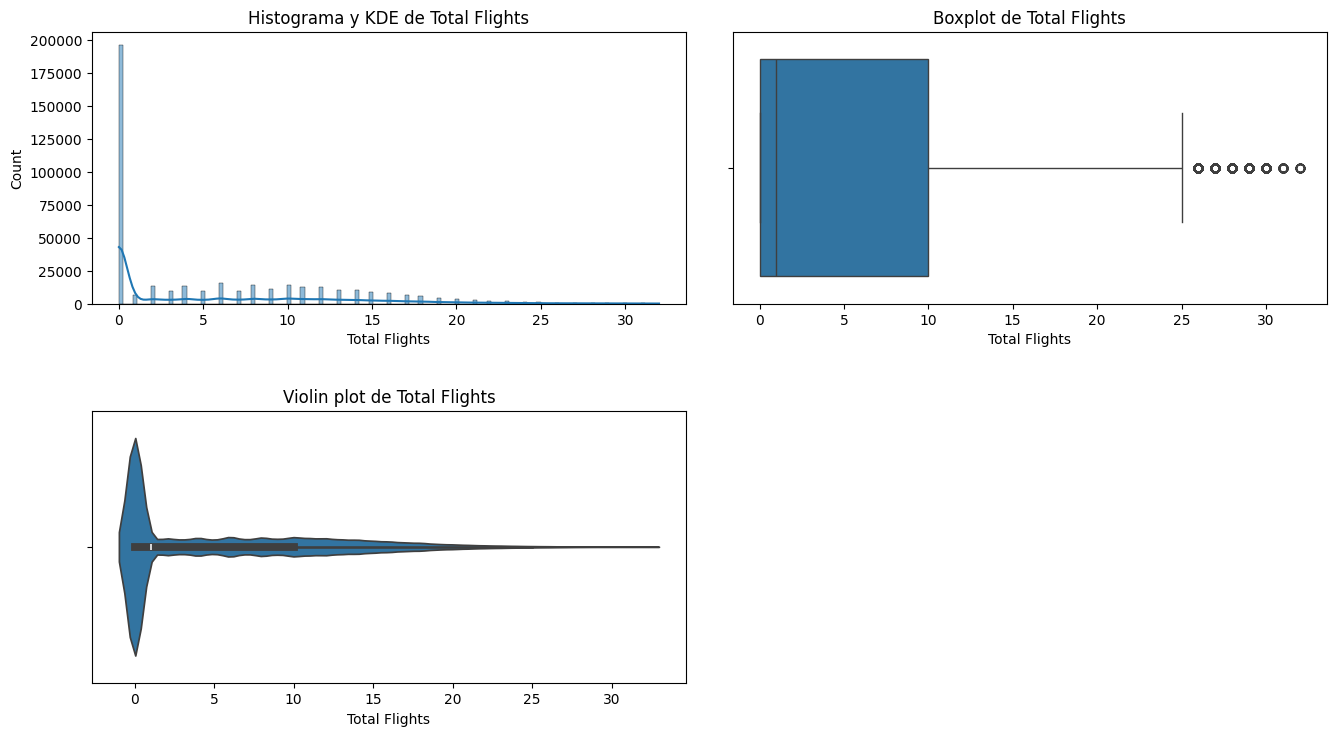

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(32),
 'mean': np.float64(5.17),
 'median': np.float64(1.0),
 'std': np.float64(6.53),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(10.0),
 'outliers_count': 1984,
 'outliers_unique_values': {26: 722,
  27: 504,
  28: 306,
  29: 214,
  30: 150,
  31: 61,
  32: 27}}

In [25]:
sp_eda.exploracion_num(df_fa,'Total Flights', graficos=True, mostrar_estadisticas=True, mostrar_outliers=True)
# Total Flights: El número total de vuelos que el cliente ha realizado, que puede incluir vuelos reservados en meses anteriores.

La columna 'Distance' es de tipo int64.
El número total de valores únicos es de 4746.
Hay muchos valores únicos, aquí algunos ejemplos: [1521 2030 1200    0  606 2037 4245 1144 3264 2340 1236 3124 2296 2772
 2944 1100 1332 2082 3399 3128]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Distance':
 - min: 0
 - max: 6293
 - mean: 1214.46
 - median: 525.0
 - std: 1434.1
 - percentil_25: 0.0
 - percentil_75: 2342.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean       1214.460979
std        1434.098521
min           0.000000
25%           0.000000
50%         525.000000
75%        2342.000000
max        6293.000000
Name: Distance, dtype: float64
--------------------------------------------------------------------------


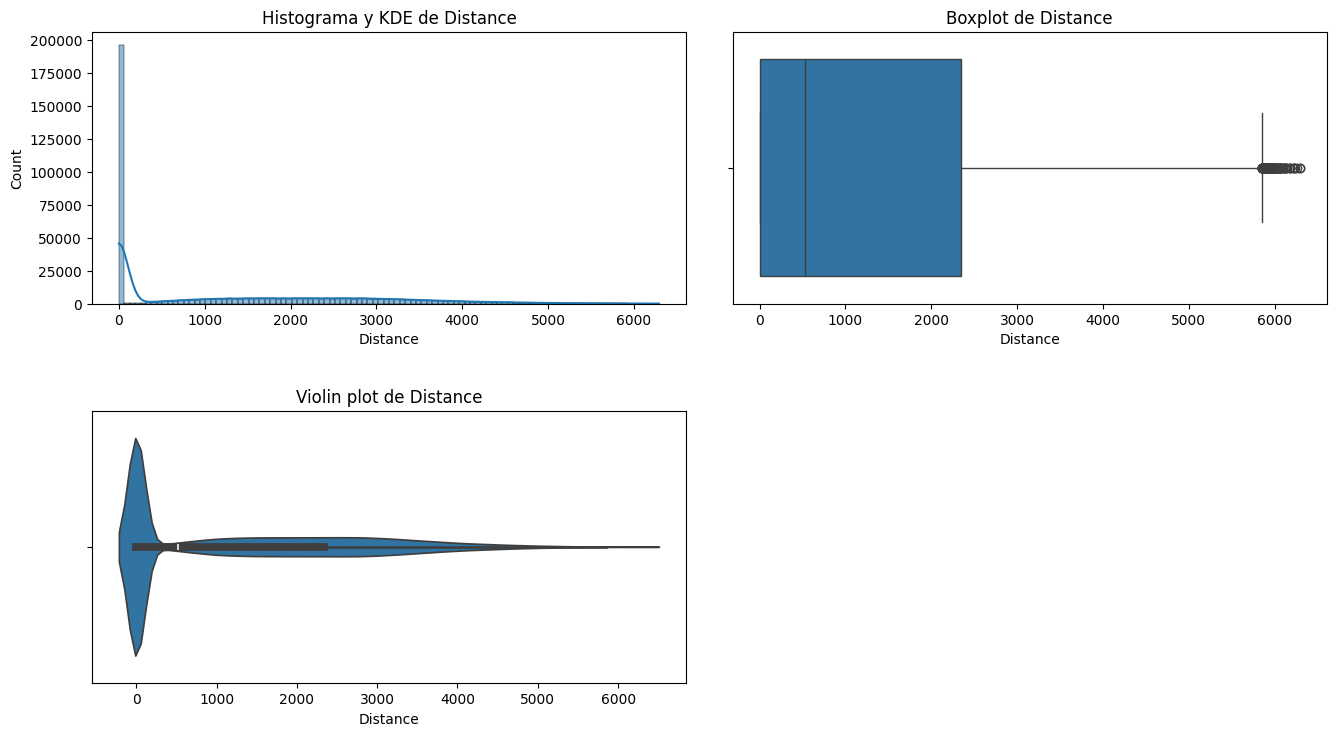

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(6293),
 'mean': np.float64(1214.46),
 'median': np.float64(525.0),
 'std': np.float64(1434.1),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(2342.0)}

In [33]:
sp_eda.exploracion_num(df_fa,'Distance', graficos=True, mostrar_estadisticas=True, mostrar_outliers=False)
# Distance: La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado durante el mes.

La columna 'Points Accumulated' es de tipo float64.
El número total de valores únicos es de 1549.
Hay muchos valores únicos, aquí algunos ejemplos: [152. 203. 120.   0.  60. 424. 114. 326. 234. 123. 312. 229. 277. 294.
 110. 133. 208. 339.  65. 151.]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Points Accumulated':
 - min: 0.0
 - max: 676.5
 - mean: 124.26
 - median: 53.0
 - std: 146.7
 - percentil_25: 0.0
 - percentil_75: 240.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean        124.263761
std         146.696179
min           0.000000
25%           0.000000
50%          53.000000
75%         240.000000
max         676.500000
Name: Points Accumulated, dtype: float64
--------------------------------------------------------------------------


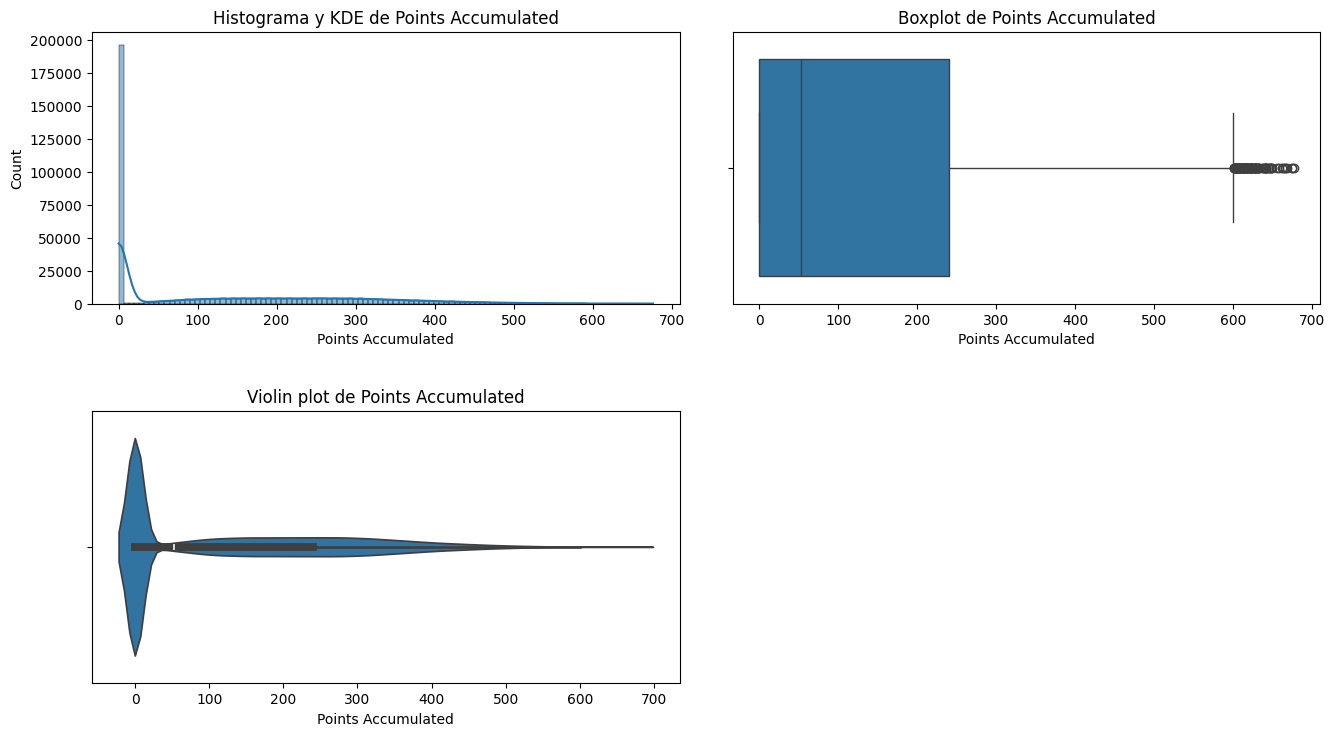

--------------------------------------------------------------------------
return - stats dict:


{'min': np.float64(0.0),
 'max': np.float64(676.5),
 'mean': np.float64(124.26),
 'median': np.float64(53.0),
 'std': np.float64(146.7),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(240.0)}

In [36]:
sp_eda.exploracion_num(df_fa,'Points Accumulated', graficos=True, mostrar_estadisticas=True, mostrar_outliers=False)
# Points Accumulated: Puntos acumulados por el cliente en el programa de lealtad durante el mes, 
# con base en la distancia volada u otros factores.

Para comprobar si realmente hay valores con decimales diferentes de 0 y por lo tanto, decidir si tiene sentido mantener la columna de tipo float y no int:

In [46]:
# Se filtran filas con decimales no enteros y se muestran algunas:
decimales_no_enteros = df_fa[df_fa['Points Accumulated'] % 1 != 0]['Points Accumulated'].unique()

print(sorted(decimales_no_enteros)[:20])  # muestra los primeros 20 valores con decimales


[np.float64(9.72), np.float64(10.8), np.float64(11.25), np.float64(11.88), np.float64(12.5), np.float64(12.96), np.float64(16.2), np.float64(16.25), np.float64(17.28), np.float64(18.36), np.float64(18.75), np.float64(19.44), np.float64(20.52), np.float64(21.25), np.float64(21.6), np.float64(22.5), np.float64(22.68), np.float64(23.75), np.float64(23.76), np.float64(24.84)]


In [45]:
df_fa[df_fa['Points Accumulated'].isin([9.72,10.8,16.2])]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
219718,605761,2018,2,1,0,1,91,9.72,0,0
219742,686783,2018,2,1,1,2,156,16.20,0,0
219744,207821,2018,4,1,0,1,95,9.72,0,0
219755,378267,2018,2,1,0,1,97,9.72,0,0
219794,478770,2018,2,1,0,1,103,10.80,0,0
220372,172233,2018,2,1,0,1,153,16.20,0,0
220397,729154,2018,4,1,0,1,154,16.20,0,0
220440,374345,2018,2,1,0,1,157,16.20,0,0
283038,721456,2018,4,1,0,1,99,9.72,0,0


Efectivamente hay valores con decimales.

La columna 'Points Redeemed' es de tipo int64.
El número total de valores únicos es de 587.
Hay muchos valores únicos, aquí algunos ejemplos: [  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Points Redeemed':
 - min: 0
 - max: 876
 - mean: 30.84
 - median: 0.0
 - std: 125.76
 - percentil_25: 0.0
 - percentil_75: 0.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean         30.838587
std         125.758002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         876.000000
Name: Points Redeemed, dtype: float64
--------------------------------------------------------------------------


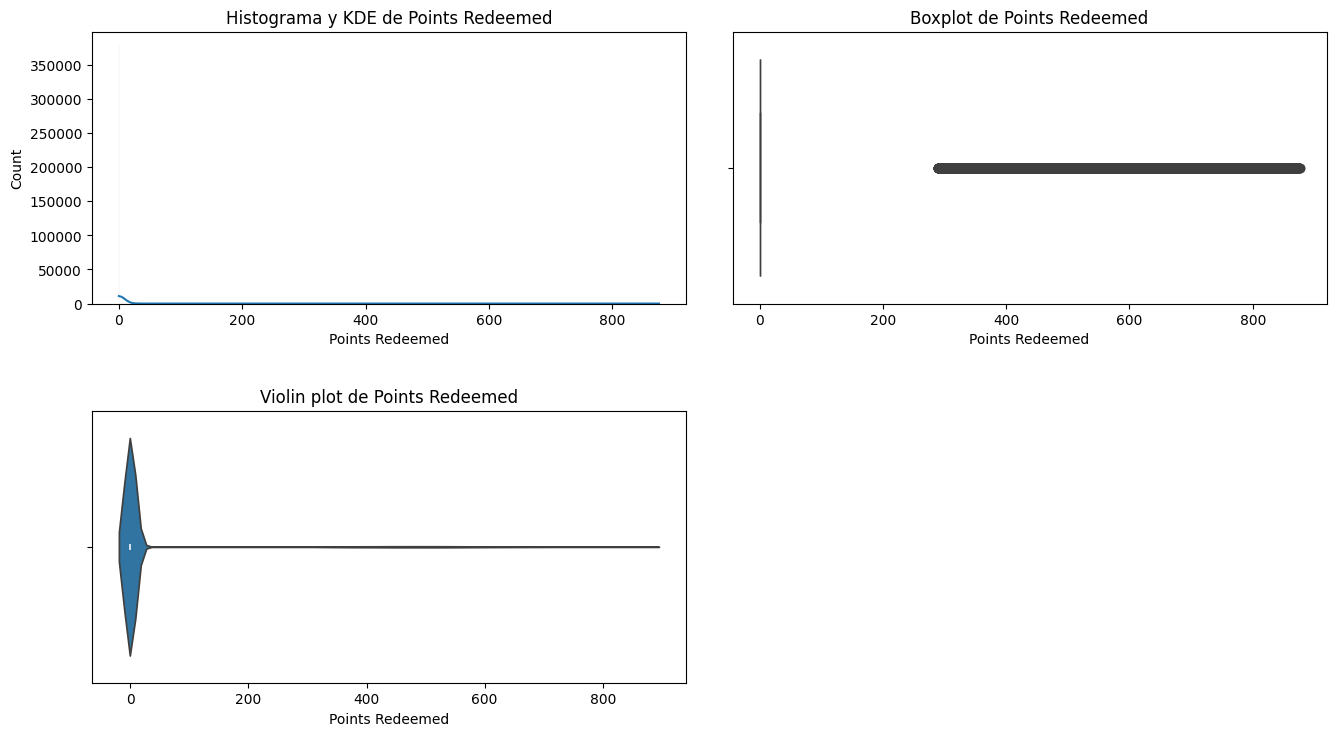

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(876),
 'mean': np.float64(30.84),
 'median': np.float64(0.0),
 'std': np.float64(125.76),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(0.0)}

In [49]:
sp_eda.exploracion_num(df_fa,'Points Redeemed', graficos=True, mostrar_estadisticas=True, mostrar_outliers=False)
# Points Redeemed: Puntos que el cliente ha redimido en el mes, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.

En la columna Points Redeemed, el 25%, 50% y 75% percentiles son 0, lo que indica que al menos el 75% de los clientes no han canjeado puntos. Por eso el boxplot se ve como una línea en 0.

La columna 'Dollar Cost Points Redeemed' es de tipo int64.
El número total de valores únicos es de 49.
Hay muchos valores únicos, aquí algunos ejemplos: [ 0 28 30 25 36 32 24 26 37 33 35 27 31 54 42 29 38 34 39 55]
--------------------------------------------------------------------------

📊 Exploración numérica de 'Dollar Cost Points Redeemed':
 - min: 0
 - max: 71
 - mean: 2.5
 - median: 0.0
 - std: 10.17
 - percentil_25: 0.0
 - percentil_75: 0.0
--------------------------------------------------------------------------

Tabla completa describe():
count    403760.000000
mean          2.495973
std          10.172033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          71.000000
Name: Dollar Cost Points Redeemed, dtype: float64
--------------------------------------------------------------------------


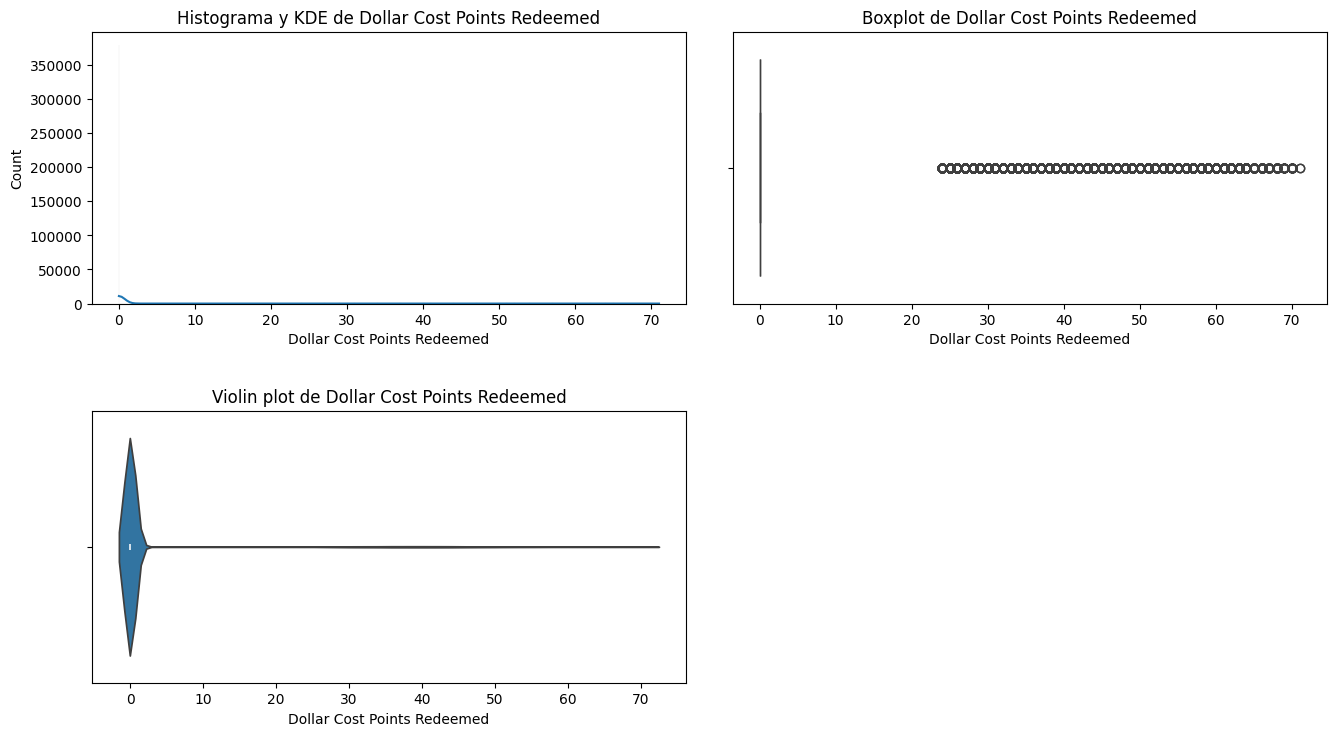

--------------------------------------------------------------------------
return - stats dict:


{'min': np.int64(0),
 'max': np.int64(71),
 'mean': np.float64(2.5),
 'median': np.float64(0.0),
 'std': np.float64(10.17),
 'percentil_25': np.float64(0.0),
 'percentil_75': np.float64(0.0)}

In [53]:
sp_eda.exploracion_num(df_fa,'Dollar Cost Points Redeemed', graficos=True, mostrar_estadisticas=True, mostrar_outliers=False)
# Dollar Cost Points Redeemed: El valor en dólares de los puntos que el cliente ha redimido durante el mes.

Igual que ocurría con la columna Points Redeemed, en Dollar Cost Points Redeemed el 25%, 50% y 75% percentiles son 0, lo que indica que al menos el 75% de los clientes no han canjeado puntos. Por eso el boxplot se ve como una línea en 0.

In [38]:
df_fa.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

### Fase 1 - Limpieza